In [1]:
import os
import shutil
import glob
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import os, tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from ultralytics import YOLO

In [2]:
detection = YOLO("yolov8n.pt")

In [3]:
classifier = load_model('modelMobile.h5')

In [4]:
categories = ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']

In [5]:
img_height = 224
img_width = 224

# PredictImage จาก การที่เอารูป รูปนึงแล้วจะ Detection object ว่ามีอะไ

In [55]:
def ImageClassified(src_img):

    results = detection.predict(src_img)
   
    boxes = results[0].boxes.xyxy.tolist()
    
    img = cv2.imread(src_img)

    directory_name = "result"

    if os.path.exists(directory_name):
        shutil.rmtree(directory_name)

    if not os.path.exists(directory_name):
        os.makedirs(directory_name)

    position = []
    
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = box
        
        detect_object = img[int(y1):int(y2), int(x1):int(x2)]

        cv2.imwrite('result/detect_obj_' + str(i) + '.jpg', detect_object)

        position.append({i: [x1, y1, x2, y2]})

    image_path = "./result/"
    lists = os.listdir(image_path)
    print(lists)

    num_images = len(lists)
    num_rows = math.ceil(num_images / 4)
    num_cols = 4
    if(num_images < 4):
        num_cols = 3
        num_rows = 1
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

    for i, img_name in enumerate(lists):
        print(image_path + img_name)

        pos = int(img_name.split('_')[-1].split('.')[0])
        
        x1, y1, x2, y2 = position[pos][pos]
        
        image_input = load_img((image_path + img_name), target_size=(img_height, img_width))
    
        # แปลงรูปภาพเป็น NumPy array
        input_img_array = img_to_array(image_input)
    
        # ทำการปรับสีของรูปภาพ
        input_img_array = input_img_array.astype('float32') / 255
    
        # ทำการเรียงรูปภาพเพื่อให้เป็นลักษณะข้อมูลของโมเดล
        input_image = np.expand_dims(input_img_array, axis=0)
    
        # ทำการพยากรณ์ด้วยโมเดล CNN
        prediction = classifier.predict(input_image)
    
        # แสดงผลลัพธ์การพยากรณ์
        predicted_label = np.argmax(prediction)

        colour = ''
         # แดง
        if (predicted_label in [0,10]):
            colour = 'red'
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)

        # เขียว
        if (predicted_label in [1]):
            colour = 'green'
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

        # เหลือง
        if (predicted_label in [2,3,4,5,6,7,8,11]):
            colour = 'yellow'
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 255), 2)

        # นํ้าเงิน
        if (predicted_label in [9]):
            colour = 'blue'
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
            
        row_index = i // 4
        col_index = i % 4
        if(num_images > 4):
            axes[row_index, col_index].imshow(image_input)
            axes[row_index, col_index].set_title("Predicted Label: {}".format(categories[predicted_label]))
            axes[row_index, col_index].text(0, -0.1,"Bin color: {}".format(colour), transform=axes[row_index, col_index].transAxes, fontsize=18, color=colour)
            axes[row_index, col_index].axis('off')
        else:
            axes[i].imshow(image_input)
            axes[i].set_title("Predicted Label: {}".format(categories[predicted_label]))
            axes[i].text(0, -0.1,"Bin color: {}".format(colour), transform=axes[row_index, col_index].transAxes, fontsize=18, color=colour)
            axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()
        
    return img
       


image 1/1 C:\deep\finishFinal\src\IMG20240312165111.jpg: 480x640 2 persons, 3 bottles, 1 cup, 1 chair, 1 dining table, 1 laptop, 1 keyboard, 63.3ms
Speed: 0.0ms preprocess, 63.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
['detect_obj_0.jpg', 'detect_obj_1.jpg', 'detect_obj_2.jpg', 'detect_obj_3.jpg', 'detect_obj_4.jpg', 'detect_obj_5.jpg', 'detect_obj_6.jpg', 'detect_obj_7.jpg', 'detect_obj_8.jpg', 'detect_obj_9.jpg']
./result/detect_obj_0.jpg
1/1 [==============================] - 0s 31ms/step
./result/detect_obj_1.jpg
1/1 [==============================] - 0s 39ms/step
./result/detect_obj_2.jpg
1/1 [==============================] - 0s 18ms/step
./result/detect_obj_3.jpg
1/1 [==============================] - 0s 31ms/step
./result/detect_obj_4.jpg
1/1 [==============================] - 0s 36ms/step
./result/detect_obj_5.jpg
1/1 [==============================] - 0s 34ms/step
./result/detect_obj_6.jpg
1/1 [==============================] - 0s 48ms/step
./resul

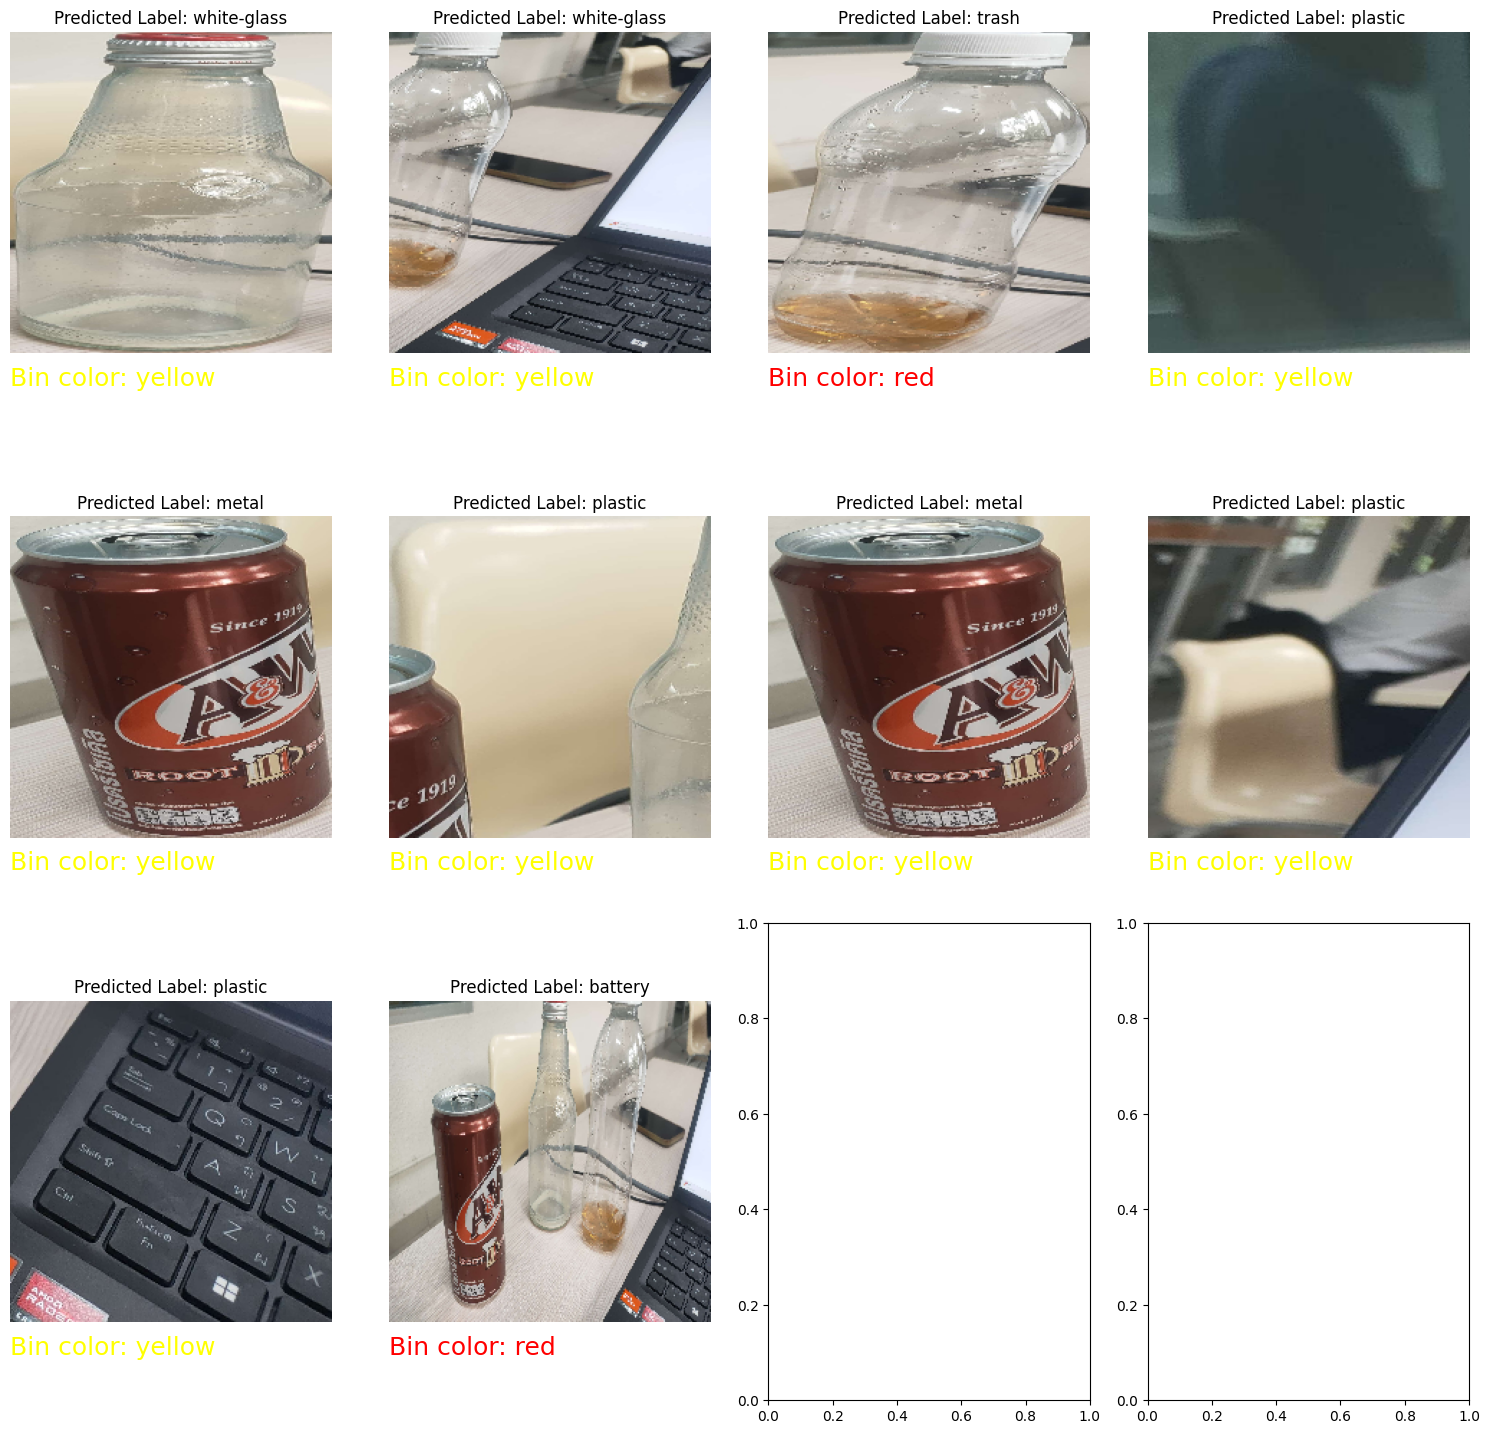

In [56]:
result = ImageClassified('IMG20240312165111.jpg')

In [8]:
cv2.imshow('Detected Object ', result)
cv2.waitKey(0)
cv2.destroyAllWindows() 

# PredictImage จากการที่เอา Image ใส่ลง ไปใน folder data

In [52]:
def PredictImage():
    # โหลดรูปภาพจากไดเรกทอรี
    image_path = "./data/"
    lists = os.listdir(image_path)
    print(lists)

    num_images = len(lists)
    num_rows = math.ceil(num_images / 4)
    num_cols = 4
    if(num_images < 4):
        num_cols = 3
        num_rows = 1
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    
    for i, img_name in enumerate(lists):
        print(image_path + img_name)
        image_input = load_img((image_path + img_name), target_size=(img_height, img_width))
    
        # แปลงรูปภาพเป็น NumPy array
        input_img_array = img_to_array(image_input)
    
        # ทำการปรับสีของรูปภาพ
        input_img_array = input_img_array.astype('float32') / 255
    
        # ทำการเรียงรูปภาพเพื่อให้เป็นลักษณะข้อมูลของโมเดล
        input_image = np.expand_dims(input_img_array, axis=0)
    
        # ทำการพยากรณ์ด้วยโมเดล CNN
        prediction = classifier.predict(input_image)
    
        # แสดงผลลัพธ์การพยากรณ์
        predicted_label = np.argmax(prediction)
        row_index = i // 4
        col_index = i % 4
        if(num_images > 4):
            axes[row_index, col_index].imshow(image_input)
            axes[row_index, col_index].set_title("Predicted Label: {}".format(categories[predicted_label]))
            axes[row_index, col_index].axis('off')
        else:
            axes[i].imshow(image_input)
            axes[i].set_title("Predicted Label: {}".format(categories[predicted_label]))
            axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()


['1687773503698 - Copy (10) - Copy - Copy - Copy - Copy - Copy.jpg']
./data/1687773503698 - Copy (10) - Copy - Copy - Copy - Copy - Copy.jpg
1/1 [==============================] - 0s 35ms/step


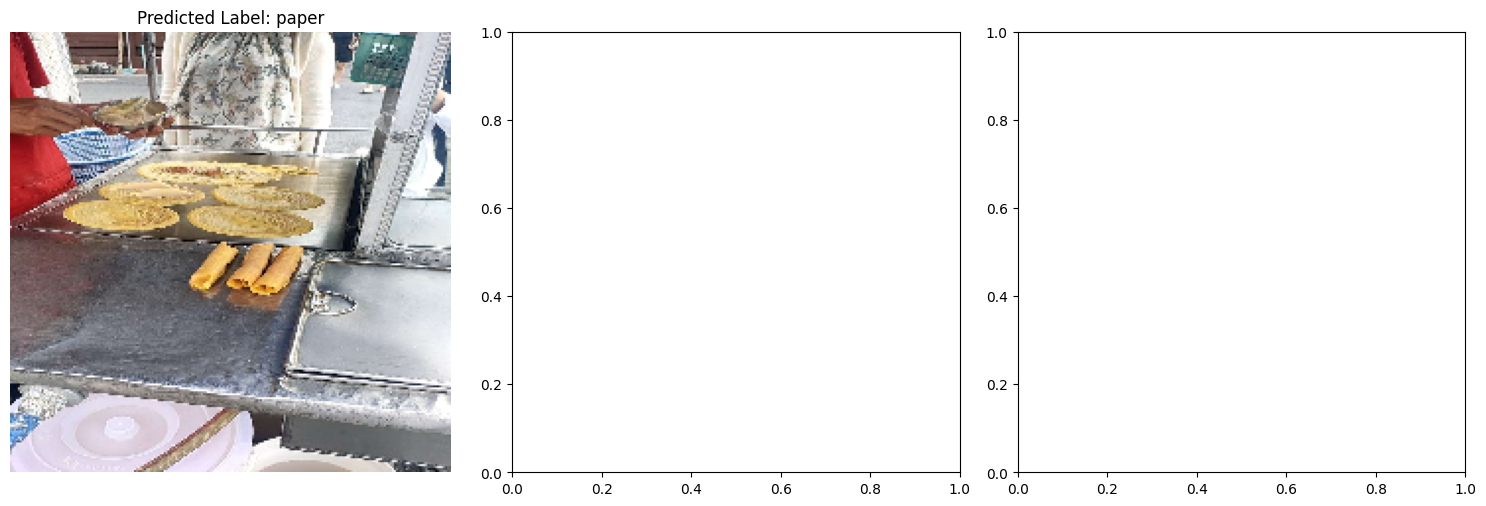

In [53]:
PredictImage()